In [2]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools


import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl
import pandas as pd
import seaborn as sb


mpl.style.use('report_style.mplstyle')

In [3]:

ps = [0.03] #np.linspace(0.01, 0.2, 20)
betas = [0.16, 0.28, 0.36, 0.4, 0.76]#np.linspace(0.05, 1, 20)
run_length = 10**5
qs = [1]
ensemble_size=10
social_structures = ['InVS15']#, 'LyonSchool', 'SFHH', 'Thiers13']

In [8]:
for social_structure in social_structures:
    
    for q in qs:

        fname_A = f'heatmap_int_A_res_{len(betas)}x{len(ps)}_{social_structure}_q={q}_{run_length}'
        data_A = pd.read_csv(f'../mean-field_studies/preacher/numerical_integration/finished_outputs/{fname_A}.csv', index_col=0)

        fname_B = f'heatmap_int_B_res_{len(betas)}x{len(ps)}_{social_structure}_q={q}_{run_length}'
        data_B = pd.read_csv(f'../mean-field_studies/preacher/numerical_integration/finished_outputs/{fname_B}.csv', index_col=0)
        
        fname_A_sim = f'heatmap_A_res_{len(betas)}x{len(ps)}_{social_structure}_{q}_{run_length*10}_{ensemble_size}'
        data_A_sim = pd.read_csv(f'../higher order ng (adaptive traveling speaker v2)/finished_outputs/{fname_A_sim}.csv', index_col=0)

        fname_B_sim = f'heatmap_B_res_{len(betas)}x{len(ps)}_{social_structure}_{q}_{run_length*10}_{ensemble_size}'
        data_B_sim = pd.read_csv(f'../higher order ng (adaptive traveling speaker v2)/finished_outputs/{fname_B_sim}.csv', index_col=0)
        
        #print(data_B_sim.head())
#         data_B.drop(columns = ['0.0'], inplace=True)
#         data_A.drop(columns = ['0.0'], inplace=True)
        

        
        colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
        sb.heatmap(data_B-data_A, cbar_kws={'label':r'$M_{MF} = N_{B}^{\ast}-N_{A}^{\ast}$'}, cmap=colormap, center=0)
        plt.title(f'Mean Field on {social_structure} q={q}')
        plt.xlabel('p')
        plt.ylabel(r'$\beta$')
        plt.savefig(f'figures/heatmap_int_res_{len(ps)}x{len(betas)}_{social_structure}_{q}_{run_length}.pdf')
        plt.show()
        
        colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
        sb.heatmap(data_B_sim-data_A_sim, cbar_kws={'label':r'$M_{simulation} = N_{B}^{\ast}-N_{A}^{\ast}$'}, cmap=colormap, center=0)
        plt.title(f'Empirical Simulation on {social_structure} q={q}')
        plt.xlabel('p')
        plt.ylabel(r'$\beta$')
        plt.savefig(f'figures/heatmap_sim_res_{len(ps)}x{len(betas)}_{social_structure}_{q}_{run_length*10}.pdf')
        plt.show()
        
        M_sim = data_B_sim - data_A_sim
        M_MF = data_B - data_A

        # difference heatmap
        colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
        sb.heatmap(M_MF-M_sim, cbar_kws={'label':r'$M_{MF}-M_{simulation}$'}, cmap=colormap, center=0)
        plt.title(f'Error in steady state prediction on {social_structure} q={q}')
        plt.xlabel(r'$p$')
        plt.ylabel(r'$\beta$')
        plt.savefig(f'figures/heatmap_difference_res_{len(ps)}x{len(betas)}_{social_structure}_{q}_{run_length*10}.pdf')
        plt.show()
        
        

FileNotFoundError: [Errno 2] No such file or directory: '../mean-field_studies/preacher/numerical_integration/finished_outputs/heatmap_int_A_res_5x1_InVS15_q=1_100000.csv'

InVS15_0.03_0.16_0.16_q=1_100000
loaded data


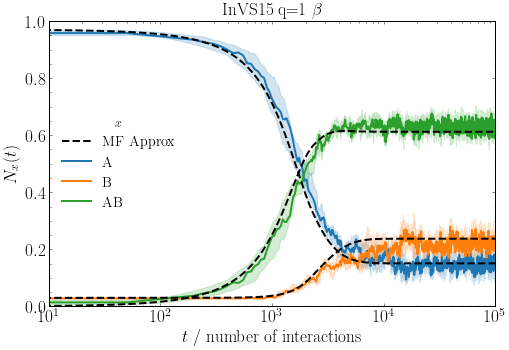

InVS15_0.03_0.28_0.28_q=1_100000
loaded data


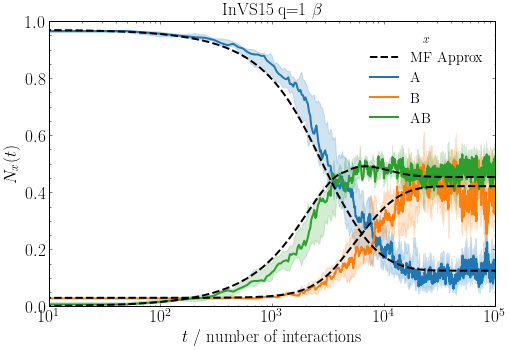

InVS15_0.03_0.36_0.36_q=1_100000
loaded data


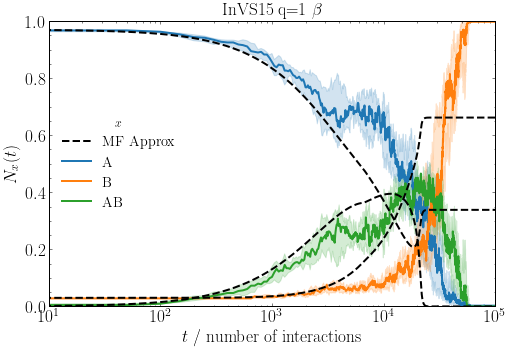

InVS15_0.03_0.4_0.4_q=1_100000
loaded data


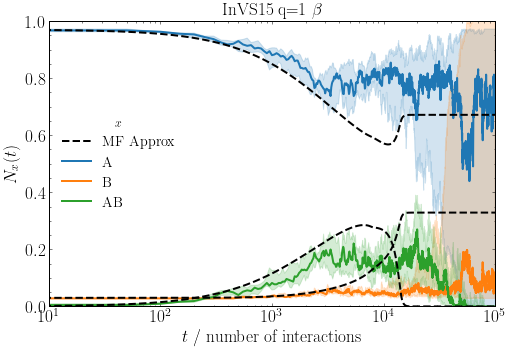

InVS15_0.03_0.76_0.76_q=1_100000
loaded data


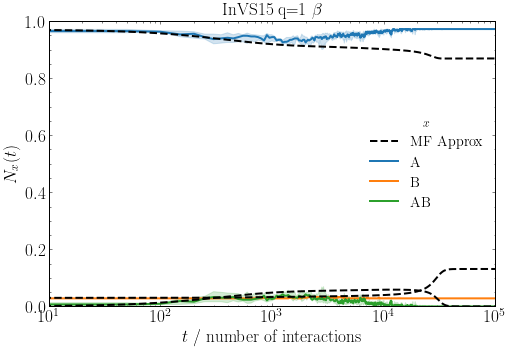

In [23]:
for social_structure in social_structures:
    
    for q in qs:
         for beta in betas:
                for p in ps:
                    fname = f'{social_structure}_{p}_{beta}_{beta}_q={q}_{run_length}'
                    data = pd.read_csv(f'../mean-field_studies/preacher/numerical_integration/outputs/{fname}.csv', index_col=0)

                    print(fname)
        
                    #print(data.head())
       
                    p = round(p,2)
                    plt.figure()
                    plt.plot(data.index.values, data['f_A'], color='black', linestyle='--', zorder=10)
                    plt.plot(data.index.values, data['f_B'], color='black', linestyle='--', zorder=10)
                    plt.plot(data.index.values, data['f_AB'], color='black', linestyle='--', label='MF Approx', zorder=10)
                    plt.legend()
                    plt.xscale('log')
                    
                    
                    
                    beta_non_committed = beta
                    beta_committed = beta
                    fname = f'{social_structure}_{p}_{beta_non_committed}_{beta_committed}_q={q}_{run_length}_{ensemble_size}' 
                    #print(fname)
                    data = genfromtxt(f'../higher order ng (adaptive traveling speaker v2)/outputs/{fname}.csv', delimiter=',')

                    print('loaded data')
                    #print(data)
                    A_data = data[0::3,::50]
                    B_data = data[1::3,::50]
                    AB_data = data[2::3,::50]

                    N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

                    A_data = A_data/N
                    B_data = B_data/N
                    AB_data = AB_data/N
                    
                    A_data_av = np.median(A_data, axis=0)
                    A_data_25 = np.percentile(A_data, 25, axis=0)
                    A_data_75 = np.percentile(A_data, 75, axis=0)
                    B_data_av = np.median(B_data, axis=0)
                    B_data_25 = np.percentile(B_data, 25, axis=0)
                    B_data_75 = np.percentile(B_data, 75, axis=0)
                    AB_data_av = np.median(AB_data, axis=0)
                    AB_data_25 = np.percentile(AB_data, 25, axis=0)
                    AB_data_75 = np.percentile(AB_data, 75, axis=0)

                    t = np.linspace(0, 10**5, num=(10**5)//50+1, endpoint=True)

                    
                    plt.plot(t, A_data_av, color='tab:blue', label=r'A')
                    plt.fill_between(t, y1=A_data_25, y2=A_data_75, color='tab:blue', alpha=0.2)
                    plt.plot(t, B_data_av, color='tab:orange', label=r'B')
                    plt.fill_between(t, y1=B_data_25, y2=B_data_75, color='tab:orange', alpha=0.2)
                    plt.plot(t, AB_data_av, color='tab:green', label=r'AB')
                    plt.fill_between(t, y1=AB_data_25, y2=AB_data_75, color='tab:green', alpha=0.2)
                    
                    #plt.title(r'$\beta$' + f' = {beta_non_committed} and q={q}')
                    plt.title(f'{social_structure} q={q} '+r'$\beta$')
                    plt.xlabel('$t$ / number of interactions')
                    plt.ylabel(r'$N_{x}(t)$')
                    plt.legend(title=r'$x$')
                    plt.xlim((10,10**5))
                    plt.ylim((0,1))
                    plt.savefig(f'figures/Comparison_{fname}_logtime.pdf')
                    plt.show()

# Comparison of edge size distribution

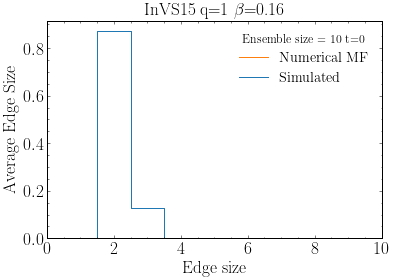

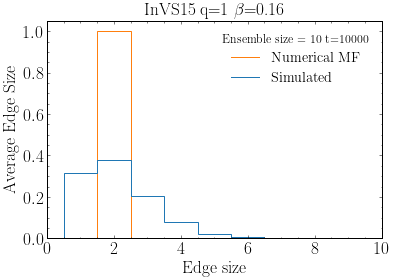

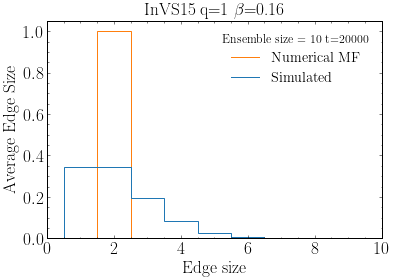

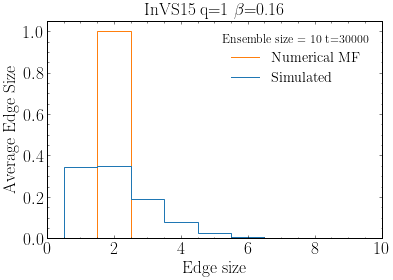

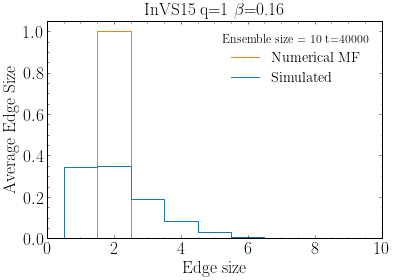

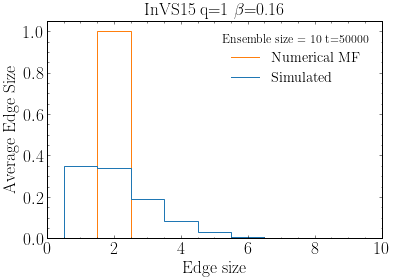

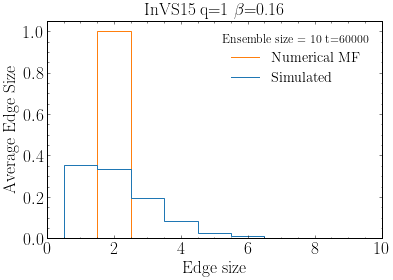

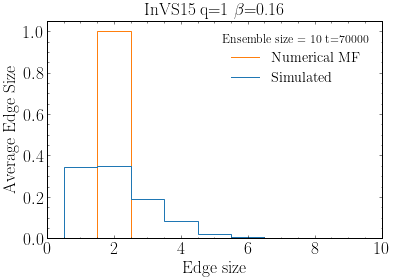

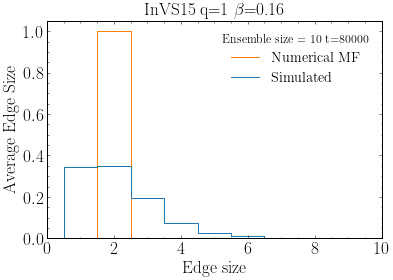

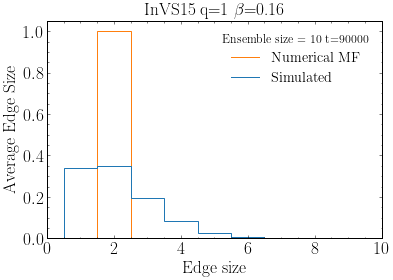

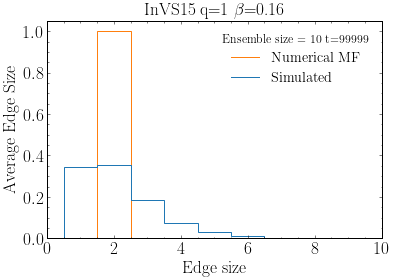

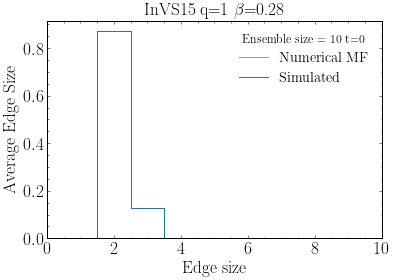

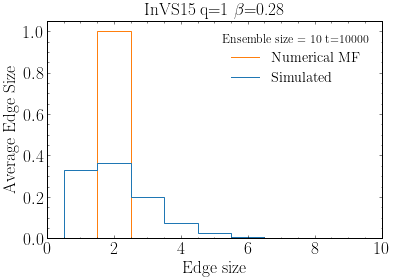

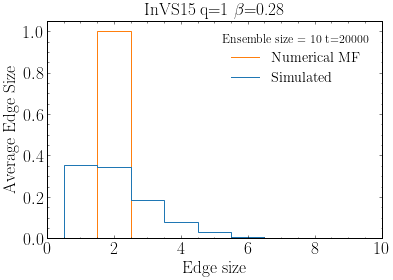

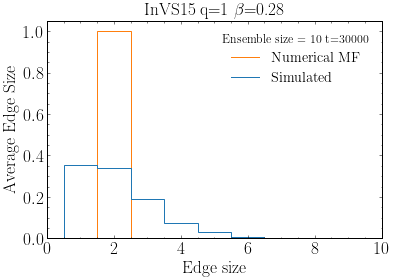

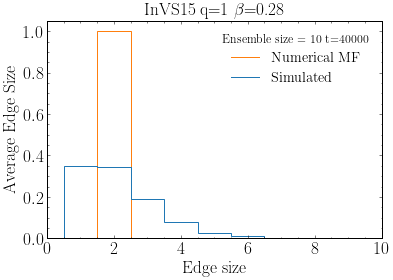

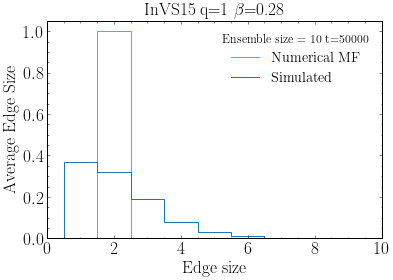

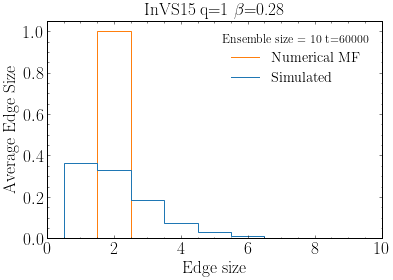

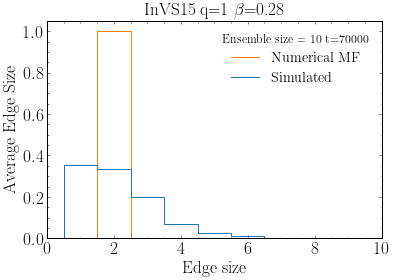

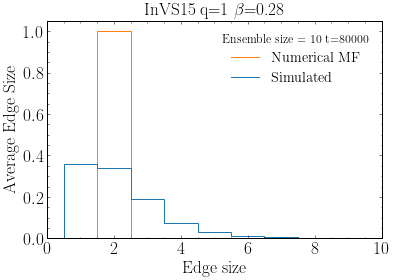

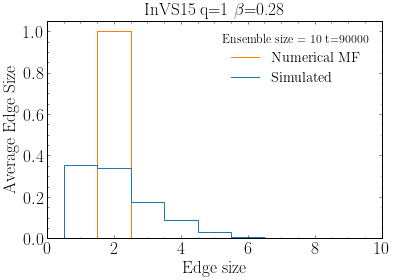

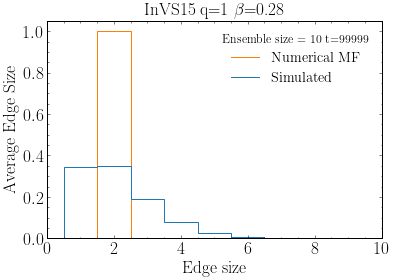

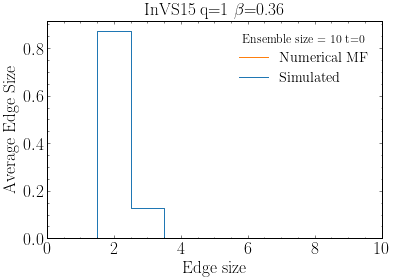

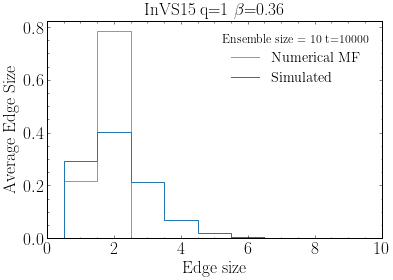

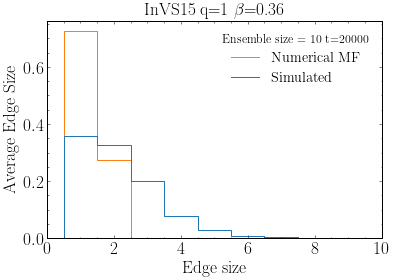

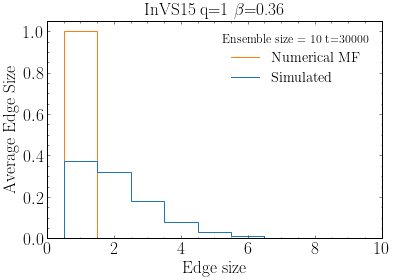

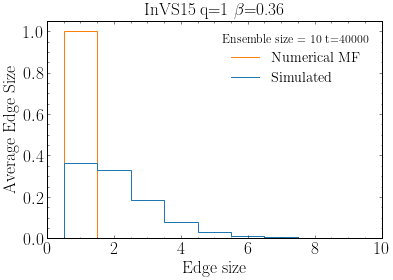

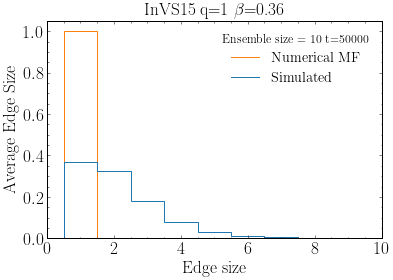

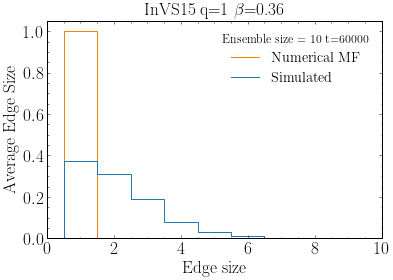

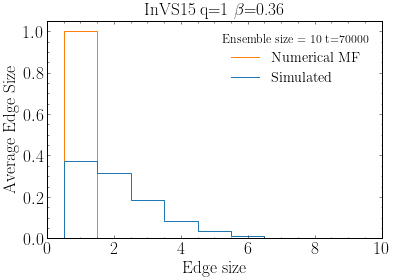

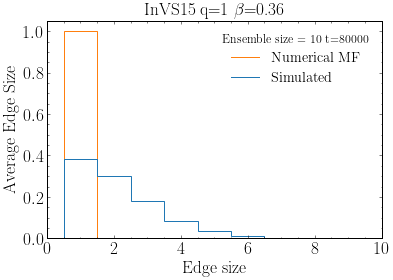

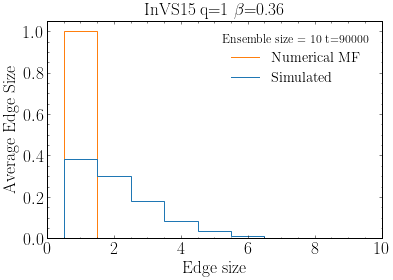

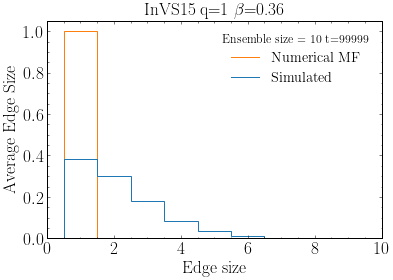

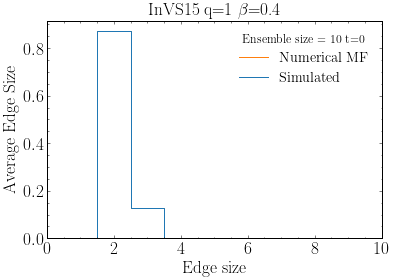

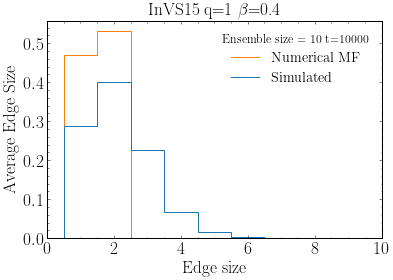

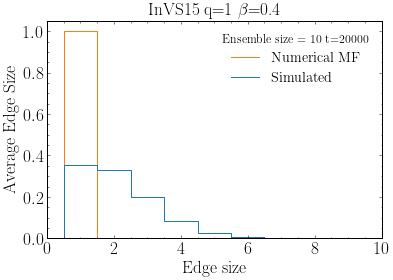

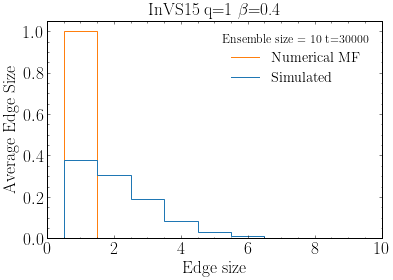

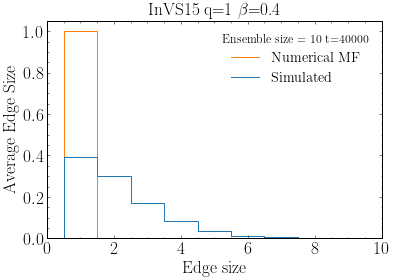

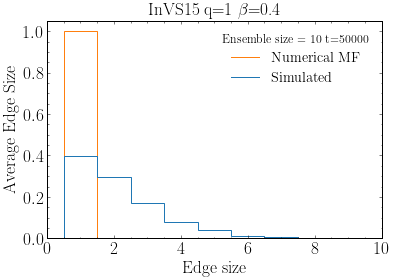

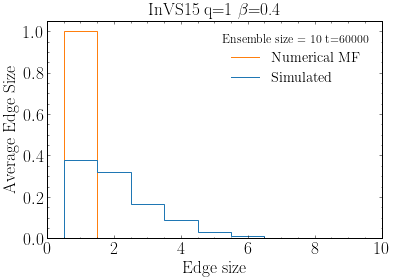

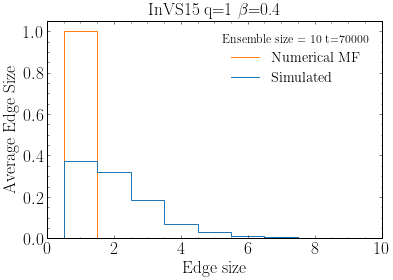

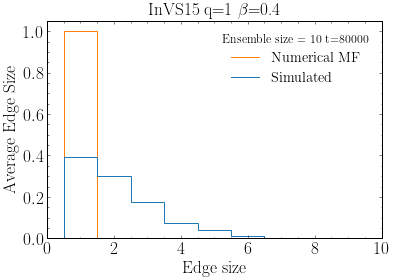

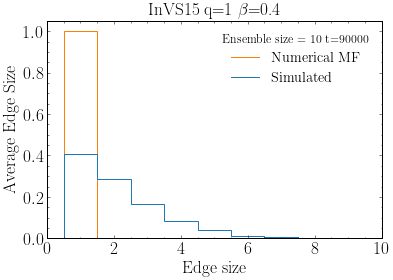

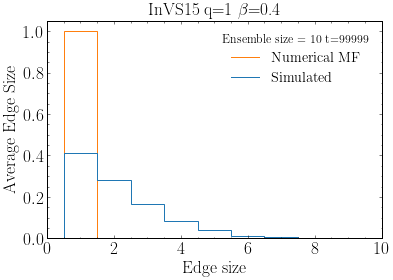

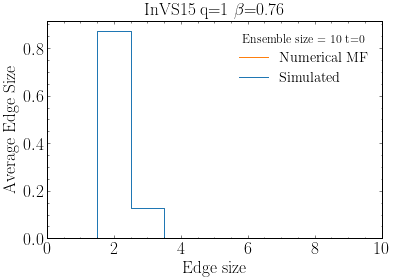

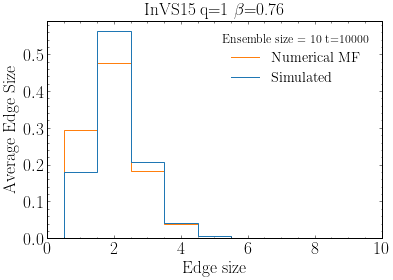

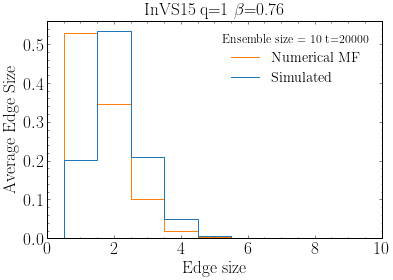

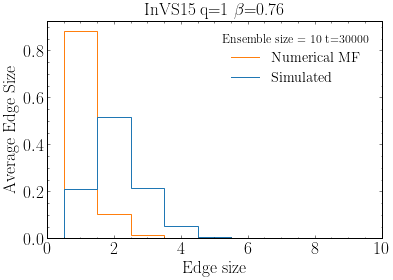

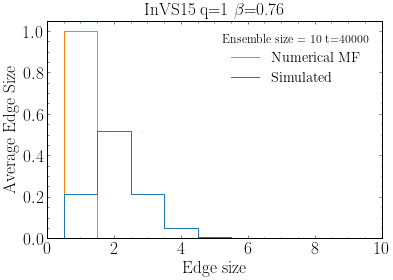

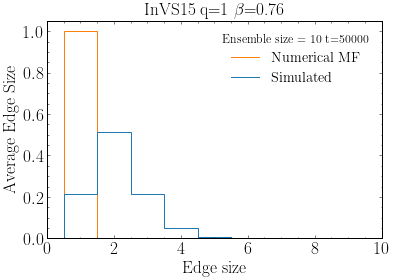

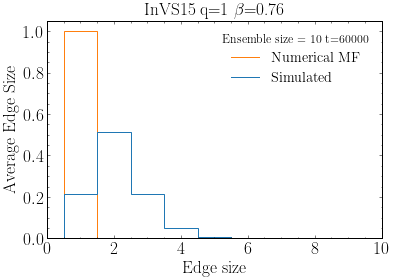

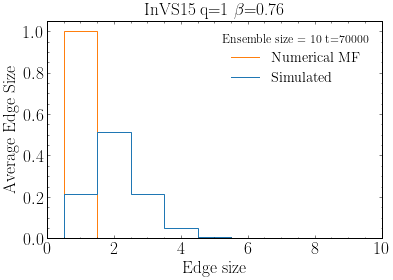

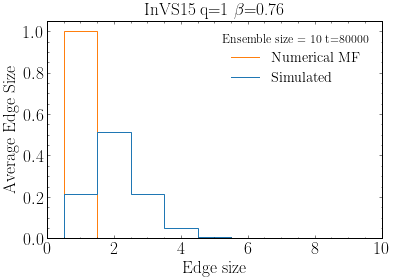

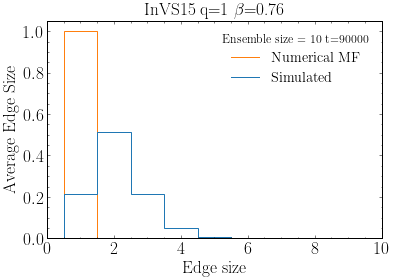

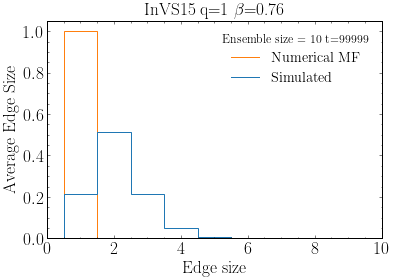

In [23]:
time = np.linspace(0, run_length,11, endpoint = True, dtype = int)

time[-1] = time[-1] -1
for social_structure in social_structures:
    for q in qs:
         for beta in betas:
                for p in ps:
                    
                    int_fname = f'edge_pdf_{social_structure}_{p}_{beta}_{beta}_q={q}_{run_length}'
                    data_int = pd.read_csv(f'../mean-field_studies/preacher/numerical_integration/outputs/{int_fname}.csv', index_col = 0 )

                    sim_fname = f'sim_edge_pdf_{social_structure}_{p}_{beta}_{beta}_q={q}_{run_length}_{3}'
                    data_sim = pd.read_csv(f'../higher order ng (adaptive traveling speaker v2)/aux_outputs/{sim_fname}.csv', index_col = 0)
#                     print(data_int.index.values)
#                     print(data_sim.index.values)
                    bin_edges = np.linspace(0.5, 213+0.5, num = 213+1, endpoint = True)
                    #print(bin_edges)
                    #print(data_int.index.values[-1])
                    for t in time:
                        plt.stairs(data_int[f'{t}'], edges=bin_edges, color='tab:orange', label='Numerical MF')
                        #plt.errorbar(same_bin_centres, mean_initial_size_binned_freq, yerr=std_initial_size_binned_freq/np.sqrt(ensemble_size), linestyle='None', color='tab:orange', capsize=3)
                        plt.stairs(data_sim[f'{t}'], edges=bin_edges,color='tab:blue', label='Simulated')
                        #plt.errorbar(same_bin_centres, mean_final_size_binned_freq, yerr=std_final_size_binned_freq/np.sqrt(ensemble_size), linestyle='None', color='tab:blue', capsize=3)
                        plt.legend(title = f'Ensemble size = {ensemble_size} t={t}')
                        plt.xlim((0, 10))
                        #plt.ylim((0, 1))
                        plt.xlabel('Edge size')
                        plt.ylabel('Frequency Density')
                        plt.title(f'{social_structure} q={q} '+r'$\beta$='+f'{beta}')
                        plt.savefig(f'figures/combined_edge_size_{int_fname}.pdf')
                        plt.show()
                        

                        
                        

In [14]:
np.linspace(0.5, 213+0.5, num =213+1, endpoint = True)

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
        54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
        63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
        72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
        81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
        90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
        99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5,
       108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5,
       117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5,
       126.5, 127.5,